<a href="https://colab.research.google.com/github/robsub/Keras/blob/main/sequential_NN_tf_Keras_deepliard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get (or create) and pre-process the data

In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [3]:
# create lists to hold samples and labels

train_labels = []
train_samples = []

Example data:

- An experimental drug was tested on individuals from ages 13 to 100 in a clinical trial. 

- The trial had 2100 participants. Half were under 65 years old, half were under 65 years or older. 

- Around 95% of patients 65 or older experienced side effects. 

- Around 95% of patients under 65% experienced no side effects. 

fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)

Trains the model for a fixed number of epochs (iterations on a dataset).

In [5]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential X and Y lets use a numpy array (y must match x format)


for i in range(50):
# 5% younger individuals who did exp side effects
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1) # 1 = side effects

# 5% older individuals who did not exp side effects
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0) # 0 = no side effects

for i in range(1000):
# 95% younger individuals who did not exp side effects
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

# 95% older individuals who did exp side effects
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)



In [14]:
for i in train_samples[:5]: # print first 5 only
    print(i)

39
64
23
58
71


In [15]:
for i in train_labels[:5]:
  print(i)

0
0
0
0
1


In [11]:
# LEts process the data to be piped into something the fit command expects (lets go with a numpy array)

train_labels = np.array(train_labels) # This line is converting the train_labels list to a numpy array. Numpy is a numerical computing library for Python and numpy.array() is a function that creates a new numpy array from a given list.
train_samples = np.array(train_samples) # This line is converting the train_samples list to a numpy array.
train_labels,train_samples = shuffle(train_labels, train_samples) # This line is shuffling the two numpy arrays train_labels and train_samples together using the shuffle() function from the sklearn.utils module. This is a common technique used in machine learning to randomize the order of the training data so that the model does not learn any order-related biases. The function returns two shuffled arrays, which are then unpacked and assigned to the original variable names train_labels and train_samples.

# Check the type of the variables after conversion
print(type(train_labels))   # Output: <class 'numpy.ndarray'>
print(type(train_samples))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


This code is scaling the train_samples data to normalize and standardize it, which is a common technique used in machine learning to improve model performance.

The MinMaxScaler is a scaler object from the sklearn.preprocessing module that scales data to a specified range, which is [0,1] in this case. The feature_range parameter specifies the desired range.

train_samples is reshaped to a 2D numpy array using the reshape() function with -1 as the first parameter and 1 as the second parameter. This is necessary because the fit_transform() method of MinMaxScaler expects a 2D array as input.

The fit_transform() method of MinMaxScaler is then called on the reshaped train_samples data to fit the scaler to the data and transform it to the specified range. The resulting scaled data is assigned to the scaled_train_samples variable.

AKA minmax scaler object used to create feature_range, feature range is then used on next line to rescale data from current range which is 13 to 100 down to a scale of 0 to 1. and the last bit ((train_samples.reshape(-1,1))) is changing data from 1 dimensional to 2 dimensional which is what is expected by the fit function. 


In [12]:


scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [16]:
for i in scaled_train_samples[:5]:
  print(i)

[0.29885057]
[0.5862069]
[0.11494253]
[0.51724138]
[0.66666667]


# Simple tf.keras Sequential Model

In [17]:
import tensorflow as tf # to BUILD our first model
from tensorflow import keras # to BUILD our first model
from tensorflow.keras.models import Sequential # to BUILD our first model
from tensorflow.keras.layers import Activation, Dense # to BUILD our first model
from tensorflow.keras.optimizers import Adam # to TRAIN our first model
from tensorflow.keras.metrics import categorical_crossentropy # to TRAIN our first model

# tensorflow is an open-source software library for dataflow and differentiable programming across a range of tasks. It is commonly used for building deep learning models.
# keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It is designed to enable fast experimentation with deep neural networks, and thus it is commonly used for building and training neural networks.
# Sequential is a Keras class for creating a sequential neural network model.
# Activation is a Keras class that specifies the activation function to be used in a neural network layer.
# Dense is a Keras class that specifies a fully connected neural network layer.
# Adam is a Keras class that specifies the optimizer used for training a neural network model.
# categorical_crossentropy is a Keras metric used to calculate the loss of a classification model during training.
# You will use these libraries and classes to define, compile, and train your neural network model for your specific machine learning task.




In [19]:
# Build the sequential model (sequential is the simplest type of model using keras or tensorflow)
# The sequential model architecture is a type of feedforward neural network, which means the information flows only in one direction, from input to output.
# Yes, that is correct. Even though backpropagation propagates the error from right to left, a neural network model that consists of only forward-pass layers, like a Sequential model in Keras, is still considered a linear model because the output of each layer is fed directly into the next layer, without any recurrent connections that would allow feedback from later layers to earlier layers. Therefore, the model can be thought of as processing its input in a linear, sequential manner, one layer at a time, from left to right.

model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'), # hidden layer (not input layer)
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax'), # output layer
])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


This code is defining a sequential model with three dense layers:

The first dense layer has 16 units/neurons, and takes an input of shape (1,) (a single input value) and applies the rectified linear unit (ReLU) activation function.
The second dense layer has 32 units/neurons and applies the ReLU activation function.
The third dense layer has 2 units/neurons and applies the softmax activation function.
The first dense layer is defined to have an input shape of (1,) because the input to the model will be a single value, and the output will be one of two classes. The final dense layer has 2 units/neurons because there are two classes to predict.

So overall, the model takes a single input value and applies two hidden layers with ReLU activation, followed by a final output layer with a softmax activation to predict one of two classes.




Rob Field
What is a dense layer? What other types of layers exist and could be used in sequential NN?

A dense layer is a type of layer in a neural network where each neuron is fully connected to all neurons in the previous layer. In a dense layer, each neuron computes a weighted sum of its inputs, adds a bias term, and applies an activation function to the result.

Other types of layers that can be used in a sequential neural network include:

Convolutional layers: these layers are used for image processing and feature extraction. They work by applying a convolution operation on the input, which is a sliding window that extracts features from the input.

Pooling layers: these layers are used in conjunction with convolutional layers to reduce the dimensionality of the feature maps and provide translation invariance.

Recurrent layers: these layers are used for processing sequential data, such as text or time series. They work by maintaining an internal state that is updated at each time step and can retain information from previous time steps.

Dropout layers: these layers are used to prevent overfitting by randomly dropping out a fraction of the neurons during training.

Batch normalization layers: these layers are used to normalize the inputs to each layer and speed up training by reducing the internal covariate shift.

Embedding layers: these layers are used for natural language processing tasks, such as text classification or sentiment analysis. They work by mapping each word in the input text to a dense vector representation.





An activation function is a mathematical function applied to the output of a neural network layer. It introduces non-linearity into the model and allows it to learn more complex patterns.

ReLU (Rectified Linear Unit) is a commonly used activation function in deep learning that returns 0 for negative inputs and the input value for non-negative inputs.

Softmax is an activation function used in the final layer of a neural network to normalize the output into a probability distribution over multiple classes. It forces the sum of the output values to be equal to 1 and makes it easier to interpret the output as probabilities.




Rob Field
When you say equal to 1, do you mean between 0 and 1?
Yes, that's correct. The softmax function is used to convert the outputs of the neural network into a probability distribution, where each output is a number between 0 and 1, and the sum of all outputs is equal to 1.




Rob Field
sum of all outputs is equal to 1. - can you explain?
The softmax activation function transforms the output of a layer into a probability distribution over the predicted classes. The function takes in a vector of arbitrary real-valued scores and squashes them down to a range between 0 and 1, so that they can be interpreted as probabilities.

The output of a softmax function is a vector of the same length as the input, where each element represents the probability of the input belonging to a particular class. The sum of all the elements in the output vector is always equal to 1, ensuring that the outputs can be interpreted as probabilities that an input belongs to each class.



The input_shape parameter in Keras defines the shape of the input data that will be passed to the neural network model. In the example you provided, the input_shape is (1,), which means that the input data will have one dimension, and the size of that dimension is 1.

In other words, the input data in this case will be a one-dimensional array with one element, such as [3] or [-2]. This is a common input shape for models that take in scalar values as inputs, such as regression models.

Other possible input shapes that could be used depending on the data could be (n,) where n is the number of input features. For example, if the input data was a 2D array with 100 rows and 10 columns, the input shape could be (10,) to indicate that there are 10 features or (100, 10) to indicate there are 100 rows and 10 columns. The choice of input shape depends on the nature of the data and the type of problem being solved.


*italicized text*

>Looking at a non sequntial model (BEYOND THE SCOPE OF THIS COURSE SO FAR):

>here's an example code snippet that uses the functional API and connects layers together by passing the output of one layer as the input to the next layer AKA NOT a sequential/linear model

>from tensorflow.keras.layers import Input, Dense
>from tensorflow.keras.models import Model

># Define the input layer
input_layer = Input(shape=(784,))

># Define the first hidden layer and connect it to the input layer
>hidden_layer_1 = Dense(units=256, activation='relu')(input_layer)

>layer
hidden_layer_2 = Dense(units=128, activation='relu')(hidden_layer_1)

># Define the output layer and connect it to the second hidden layer
output_layer = Dense(units=10, activation='softmax')(hidden_layer_2)

># Define the model using the input and output layers
model = Model(inputs=input_layer, outputs=output_layer)

>This still looks linear to me (from left to right) where are the loops?

>You're correct, the code I provided still shows a linear flow from right to left. However, with the functional API, you can create more complex models that involve loops or branches.

>For example, you can create a loop by using a for loop to repeat a layer multiple times, or you can create a branch by connecting the output of one layer to multiple subsequent layers. These more complex models are often used for tasks such as image segmentation or language translation.

>Here's an example of how you could create a simple loop using the functional API:

scss
Copy code
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_layer = Input(shape=(1,))
hidden_layer = Dense(units=16, activation='relu')(input_layer)
for i in range(3):
    hidden_layer = Dense(units=16, activation='relu')(hidden_layer)
output_layer = Dense(units=2, activation='softmax')(hidden_layer)

model = Model(inputs=input_layer, outputs=output_layer)
In this example, we use a for loop to create three hidden layers with the same architecture. The output of each hidden layer is connected to the next hidden layer in the loop, creating a loop in the model. The final output layer is connected to the last hidden layer in the loop. 

*italicized text*

# Train the NN 

In [23]:
# Call model.compile function - prepares the model for training
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
210/210 - 1s - loss: 0.3666 - accuracy: 0.8929 - 988ms/epoch - 5ms/step
Epoch 2/30
210/210 - 0s - loss: 0.3496 - accuracy: 0.8971 - 328ms/epoch - 2ms/step
Epoch 3/30
210/210 - 0s - loss: 0.3351 - accuracy: 0.9005 - 317ms/epoch - 2ms/step
Epoch 4/30
210/210 - 0s - loss: 0.3233 - accuracy: 0.9105 - 329ms/epoch - 2ms/step
Epoch 5/30
210/210 - 0s - loss: 0.3132 - accuracy: 0.9076 - 334ms/epoch - 2ms/step
Epoch 6/30
210/210 - 0s - loss: 0.3049 - accuracy: 0.9152 - 326ms/epoch - 2ms/step
Epoch 7/30
210/210 - 0s - loss: 0.2980 - accuracy: 0.9148 - 333ms/epoch - 2ms/step
Epoch 8/30
210/210 - 0s - loss: 0.2921 - accuracy: 0.9252 - 321ms/epoch - 2ms/step
Epoch 9/30
210/210 - 0s - loss: 0.2874 - accuracy: 0.9214 - 321ms/epoch - 2ms/step
Epoch 10/30
210/210 - 0s - loss: 0.2831 - accuracy: 0.9267 - 320ms/epoch - 2ms/step
Epoch 11/30
210/210 - 0s - loss: 0.2796 - accuracy: 0.9290 - 327ms/epoch - 2ms/step
Epoch 12/30
210/210 - 0s - loss: 0.2766 - accuracy: 0.9262 - 332ms/epoch - 2ms/step
E

What is being cached to cause the first epoch to take 6ms and the rest 2ms (the first time round - changed since writing this)? Presumably, something is being cached? Do you know what is? AKA What does the epoch need to do only once on the first epoch?

The time taken to complete an epoch in a neural network model can depend on several factors such as the size of the dataset, the complexity of the model, and the computing resources available.

In this case, it is possible that the first epoch took longer because the data needed to be loaded into the cache or memory. The subsequent epochs may have taken less time because the data was already loaded into the cache or memory and did not need to be reloaded. This can result in faster processing times for the subsequent epochs.

Additionally, the Keras fit() function can perform various initialization steps before the first epoch, such as compiling the model and initializing the optimizer, which may also contribute to the longer execution time for the first epoch.

It's worth noting that the differences in execution time between epochs in this example are relatively small, and it's unlikely to have a significant impact on the overall training time.




Rob Field
I can see that the accuracy improves on each epoch. This makes sense, but does the accuracy always increase per epoch? or is it because this is a simple dataset and model?

The accuracy of a model on a given dataset can increase, decrease or remain unchanged from one epoch to the next. The direction and rate of change in accuracy can depend on various factors, such as the complexity of the model, the size and quality of the training dataset, the choice of optimizer and learning rate, and the stopping criterion used to terminate the training process.

In general, when a model is underfitting the data, the accuracy is likely to increase with each epoch as the model adjusts its parameters to better fit the training data. However, when the model starts to overfit the data, the accuracy on the training dataset may continue to improve, but the accuracy on the validation dataset may start to decrease, indicating that the model is no longer generalizing well to new data.

In the case of the code snippet you provided, the accuracy is increasing on each epoch, which suggests that the model is improving its ability to fit the training data. However, it's also possible that this is due to the simplicity of the dataset and the model. In more complex scenarios, the accuracy may not increase on every epoch or may plateau at some point, indicating that the model has reached its optimal performance.

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# Build a Validation Set With TensorFlow's Keras API

CGPT
In machine learning, a validation set is a portion of the dataset used to evaluate the performance of a model during training. In the context of sequential neural networks using Keras, the validation set is typically used to evaluate the model's performance on data that it has not seen before.

During the training process, the model is typically trained on a portion of the dataset called the training set. The model's performance on the training set is used to adjust its weights and improve its accuracy. However, to ensure that the model is not overfitting (i.e., performing well on the training set but poorly on new, unseen data), it is important to evaluate the model's performance on a separate dataset that it has not been trained on. This is where the validation set comes in.

In Keras, you can specify a validation set by passing the validation_data argument to the fit() function. The validation_data argument takes a tuple of inputs and targets (e.g., (x_val, y_val)), which represent the validation data. During training, Keras will evaluate the model's performance on the validation data at the end of each epoch, and this information can be used to monitor the model's progress and adjust its hyperparameters (e.g., learning rate, batch size, etc.) to improve its accuracy.

https://deeplizard.com/learn/video/dzoh8cfnvnI

Creating A Validation Set
There are **two ways** to create a validation set to use with a tf.keras.Sequential model.

Manually Create Validation Set
The first way is to create a data structure to hold a validation set, and place data directly in that structure in the same nature we did for the training set.

This data structure should be a tuple valid_set = (x_val, y_val) of Numpy arrays or tensors, where x_val is a numpy array or tensor containing validation samples, and y_val is a numpy array or tensor containing validation labels.

When we call model.fit(), we would pass in the validation set in addition to the training set. We pass the validation set by specifying the validation_data parameter.

model.fit(
      x=scaled_train_samples
    , y=train_labels
    , validation_data=valid_set
    , batch_size=10
    , epochs=30
    , verbose=2
)
When the model trains, it would continue to train only on the training set, but additionally, it would also be evaluating the validation set.

Create Validation Set With Keras
There is another way to create a validation set, and it saves a step!

If we don't already have a specified validation set created, then when we call model.fit(), we can set a value for the validation_split parameter. It expects a fractional number between 0 and 1. Suppose that we set this parameter to 0.1.

model.fit(
      x=scaled_train_samples
    , y=train_labels
    , validation_split=0.1
    , batch_size=10
    , epochs=30
    , verbose=2
)
With this parameter specified, Keras will split apart a fraction (10% in this example) of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.

Note that the fit() function shuffles the data before each epoch by default. When specifying the validation_split parameter, however, the validation data is selected from the last samples in the x and y data before shuffling.

Therefore, in the case we're using validation_split in this way to create our validation data, we need to be sure that our data has been shuffled ahead of time, like we previously did in an earlier episode.

Interpret Validation Metrics
Now, regardless of which method we use to create validation data, when we call model.fit(), then in addition to loss and accuracy being displayed for each epoch as we saw last time, we will now also see val_loss and val_acc to track the loss and accuracy on the validation set.

# Create Validation Set With Keras 

In [26]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.2585 - accuracy: 0.9344 - val_loss: 0.2074 - val_accuracy: 0.9476 - 566ms/epoch - 3ms/step
Epoch 2/30
189/189 - 0s - loss: 0.2579 - accuracy: 0.9354 - val_loss: 0.2071 - val_accuracy: 0.9476 - 323ms/epoch - 2ms/step
Epoch 3/30
189/189 - 0s - loss: 0.2575 - accuracy: 0.9381 - val_loss: 0.2074 - val_accuracy: 0.9571 - 362ms/epoch - 2ms/step
Epoch 4/30
189/189 - 0s - loss: 0.2568 - accuracy: 0.9402 - val_loss: 0.2061 - val_accuracy: 0.9476 - 407ms/epoch - 2ms/step
Epoch 5/30
189/189 - 0s - loss: 0.2564 - accuracy: 0.9376 - val_loss: 0.2053 - val_accuracy: 0.9476 - 403ms/epoch - 2ms/step
Epoch 6/30
189/189 - 0s - loss: 0.2559 - accuracy: 0.9392 - val_loss: 0.2055 - val_accuracy: 0.9476 - 337ms/epoch - 2ms/step
Epoch 7/30
189/189 - 1s - loss: 0.2555 - accuracy: 0.9354 - val_loss: 0.2052 - val_accuracy: 0.9476 - 558ms/epoch - 3ms/step
Epoch 8/30
189/189 - 1s - loss: 0.2551 - accuracy: 0.9349 - val_loss: 0.2052 - val_accuracy: 0.9571 - 526ms/epoch - 3ms/step


With this parameter specified, Keras will split apart a fraction (10% in this example) of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.

Note that the fit() function shuffles the data before each epoch by default. When specifying the validation_split parameter, however, the validation data is selected from the last samples in the x and y data before shuffling.

Therefore, in the case we're using validation_split in this way to create our validation data, we need to **be sure that our data has been shuffled ahead of time, like we previously did in an earlier episode.**

# Interpret Validation Metrics
Now, regardless of which method we use to create validation data, when we call model.fit(), then in addition to loss and accuracy being displayed for each epoch as we saw last time, we will now also see val_loss and val_acc to track the loss and accuracy on the validation set.

We can now see not only how well our model is learning the features of the training data, but also how well the model is generalizing to new, unseen data from the validation set (so no overfitting, which is good). Next, we'll see how to use our model for inference.

CGPTOverfitting occurs when a machine learning model becomes too complex and starts to fit the noise in the training data rather than the underlying patterns in the data. This leads to poor generalization performance on new, unseen data, as the model is too specific to the training data and does not capture the underlying patterns that are common across the data.

# Neural Network Predictions with TensorFlow's Keras API (use our model for inference)

In this episode, we'll demonstrate how to use a neural network for inference to make predictions on data from a test set. We'll continue working with the same tf.keras.Sequential model and data that we've used in the last few episodes to do so.


As we touched on previously, when we train a model, the hope is that we'll later be able to take the trained model, apply it to new data, and have the model generalize and accurately predict on data it hasn't seen before.

For example, suppose we have a model that categorizes images of cats or dogs and that the training data contained thousands of images of cats and dogs from a particular data set online.

What Is Inference?
Now suppose that later we want to take this model and use it to predict on other images of cats and dogs from a different data set. The hope is that, even though our model wasn't exposed to these particular dog and cat images during training, it will still be able to accurately make predictions for them based on what it's learned from the cat and dog data set from which it was trained.

We call this process inference, as the model is using its knowledge gained from training and using it to infer a prediction or result.

At this point, the model we've been working with over the past few episodes has now been trained and validated. Given the results we've seen from the validation data, it appears that this model should do well on predicting on a new test set.

Note that the test set is the set of data used specifically for inference after training has concluded. You can find more information on all the different types of data sets used in deep learning in the Deep Learning Fundamentals course.

# Creating The Test Set
We'll create a test set in the same fashion for which we created the training set. In general, the test set should always be processed in the same way as the training set.

We won't go step-by-step over the code that generates and processes the test data below, as it has already been covered in detail in an earlier episode where we generated the training data, but be sure you have all the imports in place from the previous episodes, as well as all of the existing code up to this point.



In [28]:
test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

# Predict (on the test data)

To get predictions from the model for the test set, we call model.predict().

In [29]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0
)

To this function, we pass in the test samples x, specify a batch_size, and specify which level of verbosity we want from log messages during prediction generation. The output from the predictions won't be relevant for us, so we're setting verbose=0 for no output.

Note that, unlike with training and validation sets, we do not pass the labels of the test set to the model during the inference stage.

To see what the model's predictions look like, we can iterate over them and print them out.

In [31]:
for i in predictions:
    print(i)
                #  0          1           test_labels.append(0)     test_labels.append(1)
    # Output eg: [0.9188097  0.08119021] - model is assigning a 92% probability of this patient not exp a side effect and around 8% probability of this patient exp a side effect. 


[0.9188097  0.08119021]
[0.03614618 0.9638539 ]
[0.27526   0.7247401]
[0.02743222 0.9725678 ]
[0.3187455 0.6812545]
[0.9698119  0.03018805]
[0.0207737  0.97922635]
[0.9761416  0.02385842]
[0.9747692  0.02523084]
[0.9660294  0.03397056]
[0.9754777  0.02452233]
[0.97252196 0.02747807]
[0.9760652 0.0239347]
[0.9679746  0.03202535]
[0.93254644 0.0674535 ]
[0.10498349 0.8950165 ]
[0.7901769  0.20982301]
[0.9761263  0.02387366]
[0.9747692  0.02523084]
[0.9639705  0.03602953]
[0.16885583 0.83114403]
[0.46657914 0.5334208 ]
[0.16885583 0.83114403]
[0.03297994 0.96702003]
[0.97404075 0.02595928]
[0.97611105 0.0238889 ]
[0.9679746  0.03202535]
[0.97252196 0.02747807]
[0.07420922 0.9257908 ]
[0.9760271  0.02397294]
[0.9761263  0.02387366]
[0.06217197 0.93782794]
[0.93254644 0.0674535 ]
[0.9760652 0.0239347]
[0.97609586 0.02390416]
[0.05686053 0.9431395 ]
[0.97610337 0.02389652]
[0.97610337 0.02389652]
[0.16885585 0.83114415]
[0.10498349 0.89501643]
[0.9554852  0.04451472]
[0.0207737  0.97922635]


Each element in the predictions list is itself a list of length 2. The sum of the two values in each list is 1. The reason for this is because the two columns contain probabilities for each possible output: experienced side effects and did not experience side effects. Each element in the predictions list is a probability distribution over all possible outputs.

The first column contains the probability for each patient not experiencing side effects, which is represented by a 0. The second column contains the probability for each patient experiencing side effects, which is represented by a 1.

We can also look only at the most probable prediction.

In [33]:
rounded_predictions = np.argmax(predictions, axis=-1)

for i in rounded_predictions:
    print(i)

    # Output    0 - this patient likely has no side effects
     #         1 -  this patient likely has Create A Confusion Matrix For Neural Network Predictionsside effects
     #         1
      #        1

0
1
1
1
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
1
1
0
0
0
0
1
0
0
1
0
0
0
1
0
0
1
1
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
1
1
1
1
1
0
0
1
1
1
1
0
1
1
0
1
0
1
1
0
1
1
0
1
1
1
1
1
1
0
0
1
0
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
0
1
0
1
0
1
1
1
1
0
1
0
0
0
1
0
0
1
0
0
1
0
0
1
1
1
1
1
1
0
0
1
0
1
0
1
0
0
1
0
1
1
1
0
0
1
1
0
1
0
1
1
0
0
1
0
1
1
1
1
0
1
0
1
0
0
0
0
0
1
1
1
1
0
0
1
0
0
1
1
0
1
0
0
1
0
0
1
0
1
1
0
1
0
1
0
0
0
1
1
1
1
0
1
0
1
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
1
0
1
1
1
1
0
1
1
1
0
0
0
1
1
1
0
0
1
1
1
0
0
1
1
0
1
1
1
1
0
1
1
0
0
0
0
0
0
1
1
0
1
0
1
0
1
0
0
0
0
1
0
0
1
1
1
1
1
0
1
1
1
1
1
1
0
0
1
1
0
1
0
0
0
1
1
1
0
0
1
1
1
0
1
1
0
1
0
0
0
1
1
1
1
0
0
0
0
1
0
1
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
1
0
0
1
0
1
1
0
0
0
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
0
1
1
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
1
1
1
1
1
1
0
1
1
0
1
0
0
0
1
0
1
0
0
1
1
0
0
1
1
1
0


From the printed prediction results, we can observe the underlying predictions from the model, however, we cannot judge how accurate these predictions are just by looking at the predicted output.

If we have corresponding labels for the test set, (for which, in this case, we do), then we can compare these true labels to the predicted labels to judge the accuracy of the model's evaluations. We'll see how to visualize this using a tool called a confusion matrix in the next episode.

# Create A Confusion Matrix For Neural Network Predictions


In this episode, we'll demonstrate how to create a confusion matrix, which will aid us in being able to visually observe how well a neural network is predicting during inference.

We'll continue working with the predictions we obtained from the tf.keras.Sequential model in the last episode.

With a confusion matrix, we'll be able to visually observe how well the model predicts on test data.

Let's jump into the code for how this is done.

# Plotting A Confusion Matrix
First, we import all the required libraries we'll be working with.

In [35]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

The confusion matrix we'll be plotting comes from scikit-learn.

We then create the confusion matrix and assign it to the variable cm. T

In [36]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

To the confusion matrix, we pass in the true labels test_labels as well as the network's predicted labels rounded_predictions for the test set.

Below, we have a function called plot_confusion_matrix() that came directly from scikit-learn's website. This is code that they provide in order to plot the confusion matrix.



In [37]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Next, we define the labels for the confusion matrix. In our case, the labels are titled “no side effects” and “had side effects.”

In [38]:
cm_plot_labels = ['no_side_effects','had_side_effects']

Lastly, we plot the confusion matrix by using the plot_confusion_matrix() function we just discussed. To this function, we pass in the confusion matrix cm and the labels cm_plot_labels, as well as a title for the confusion matrix.

Confusion matrix, without normalization
[[195  15]
 [ 10 200]]


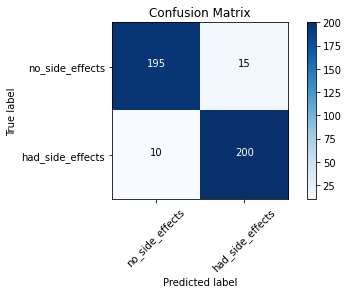

In [39]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Reading A Confusion Matrix
Looking at the plot of the confusion matrix, we have the predicted labels on the x-axis and the true labels on the y-axis. The blue cells running from the top left to bottom right contain the number of samples that the model accurately predicted. The white cells contain the number of samples that were incorrectly predicted.

There are 420 total samples in the test set. Looking at the confusion matrix, we can see that the model accurately predicted 391 out of 420 total samples. The model incorrectly predicted 29 out of the 420.

For the samples the model got correct, we can see that it accurately predicted that the patients would experience no side effects 191 times. It incorrectly predicted that the patient would have no side effects 10 times when the patient did actually experience side effects.

On the other side, the model accurately predicted that the patient would experience side effects 200 times that the patient did indeed experience side effects. It incorrectly predicted that the patient would have side effects 19 times when the patient actually did not experience side effects.

As you can see, this is a good way we can visually interpret how well the model is doing at its predictions and understand where it may need some work.

# Save And Load A Model With TensorFlow's Keras API



# Saving And Loading The Model In Its Entirety
If we want to save a model at its current state after it was trained so that we could make use of it later, we can call the save() function on the model. To save(), we pass in the file path and name of the file we want to save the model to with an h5 extension.

In [41]:
model.save('models/medical_trial_model.h5')




Note, this function also allows for saving the model as a Tensorflow SavedModel as well if you'd prefer.

This method of saving will save everything about the model – the architecture, the weights, the optimizer, the state of the optimizer, the learning rate, the loss, etc.

Now that we have this model saved, we can load the model at a later time.

To do so, we first import the load_model() function. Then, we can call the function to load the model by pointing to the saved model on disk.





In [42]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')


We can verify that the loaded model has the same architecture and weights as the saved model by calling summary() and get_weights() on the model.

In [43]:
new_model.summary()

# Model: "sequential_1"
# _________________________________________________________________
# Layer (type)                 Output Shape              Param #   
# =================================================================
# dense_1 (Dense)              (None, 16)                32        
# _________________________________________________________________
# dense_2 (Dense)              (None, 32)                544       
# _________________________________________________________________
# dense_3 (Dense)              (None, 2)                 66        
# =================================================================
# Total params: 642
# Trainable params: 642
# Non-trainable params: 0
# _________________________________________________________________


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


We can also inspect attributes about the model, like the optimizer and loss by calling model.optimizer and model.loss on the loaded model and compare the results to the previously saved model.

This is the most encompassing way to save and load a model.

# Saving And Loading Only The Architecture Of The Model
There is another way we save only the architecture of the model. This will not save the model weights, configurations, optimizer, loss or anything else. This only saves the architecture of the model.

We can do this by calling model.to_json(). This will save the architecture of the model as a JSON string. If we print out the string, we can see exactly what this looks like.

In [44]:
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_3_input"}}, {"class_name": "Dense", "config": {"name": "dense_3", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_4", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "

Now that we have this saved, we can create a new model from it. First we'll import the needed model_from_json function, and then we can load the model architecture.

In [45]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

By printing the summary of the model, we can verify that the new model has the same architecture of the model that was previously saved.

In [47]:
model_architecture.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


Note, we can also use this same approach to saving and loading the model architecture to and from a YAML string. To do so, we use the functions to_yaml() and model_from_yaml() in the same fashion as we called the json functions.

# Saving And Loading The Weights Of The Model
The last saving mechanism we'll discuss only saves the weights of the model.

We can do this by calling model.save_weights() and passing in the path and file name to save the weights to with an h5 extension.

In [48]:
model.save_weights('models/my_model_weights.h5')

At a later point, we could then load the saved weights in to a new model, but the new model will need to have the same architecture as the old model before the weights can be saved.

In [49]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

model2.load_weights('models/my_model_weights.h5')

We've now seen how to save only the weights of a model and deploy those weights to a new model, how to save only the architecture and then deploy that architecture to a model, and how to save everything about a model and deploy it in its entirety at a later time. Each of these saving and loading mechanisms may come in useful in differing scenarios.